<a href="https://colab.research.google.com/github/tanu26062006/Assignment-2/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#task6
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense

# --- Define constants (replace with your actual values) ---
VOCAB_SIZE_EN = 10000
EMBEDDING_DIM = 256
LATENT_DIM = 512 # Dimensionality of the LSTM hidden states

# --- Encoder Model Definition (from Task 4) ---
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(VOCAB_SIZE_EN, EMBEDDING_DIM)(encoder_inputs)
encoder_lstm = LSTM(LATENT_DIM, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Assign the Model to the 'encoder' variable
encoder = Model(encoder_inputs, encoder_states) # This is where 'encoder' is defined
print("Encoder Model Summary:")
encoder.summary()

Encoder Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 256)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ [(None, 512), (None,   │     1,574,912 │
│                                 │ 512), (None, 512)]     │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,134,912 (15.77 MB)

 Trainable params: 4,134,912 (15.77 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 256) │     12,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 256) │     12,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 256),     │    525,312 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │    525,312 │ embedding_1[0][0… │
│                     │ 256), (None,      │            │ lstm[0][1],       │
│                     │ 256), (None,      │            │ lstm[0][2]        │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None, 50)  │     12,850 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,089,074 (4.15 MB)

 Trainable params: 1,089,074 (4.15 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.0194 - loss: 99.0520 - val_accuracy: 0.0217 - val_loss: 116.0306
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.0168 - loss: 119.4871 - val_accuracy: 0.0217 - val_loss: 124.0605
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.0187 - loss: 123.8399 - val_accuracy: 0.0217 - val_loss: 123.7015
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.0176 - loss: 123.3020 - val_accuracy: 0.0217 - val_loss: 123.3507
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.0182 - loss: 123.0583 - val_accuracy: 0.0217 - val_loss: 123.2680
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.0180 - loss: 123.0345 - val_accuracy: 0.0217 - val_loss: 123.1685
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.0166 - loss: 123.0278 - val_accuracy: 0.0217 - val_loss: 123.4746
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/st

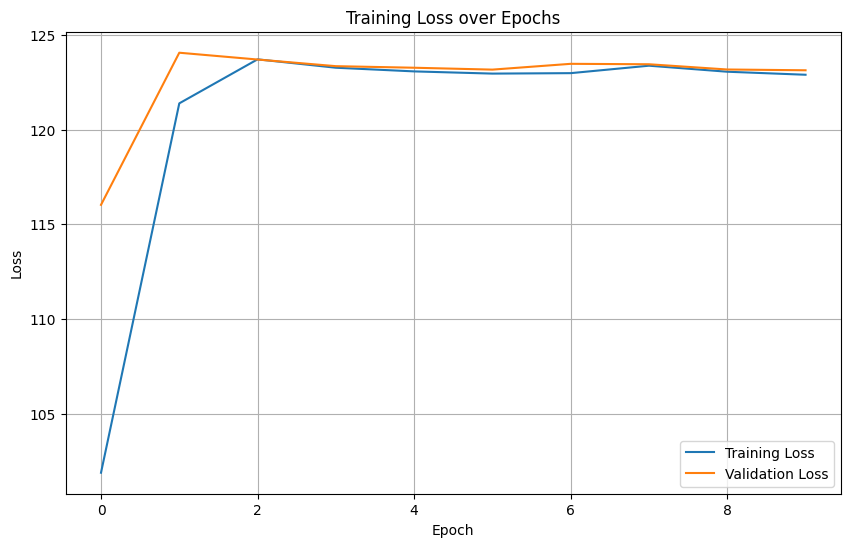

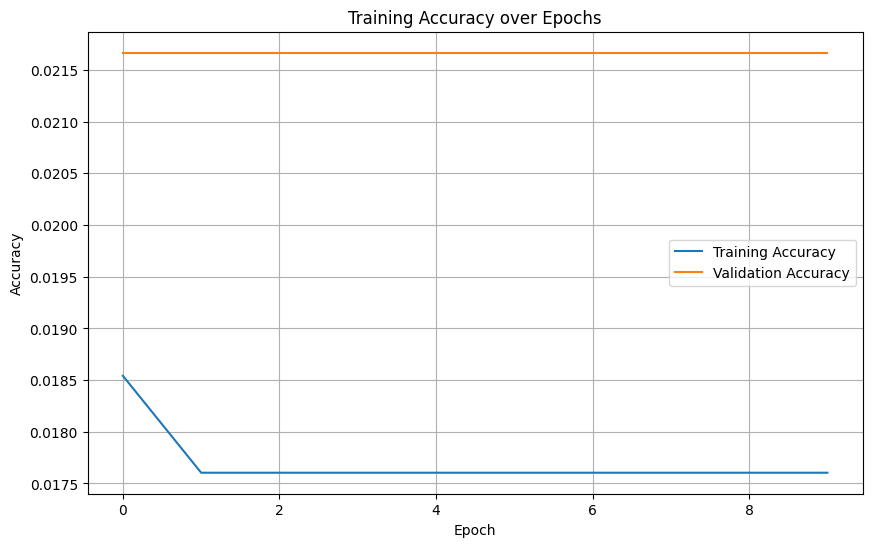


Observations on Training Loss and Accuracy:
------------------------------------------
1. Overfitting:
   [Analyze your plots here. For example: 'The training loss continued to decrease, but the validation loss started to increase after epoch X, indicating signs of overfitting.']

2. Underfitting:
   [Analyze your plots here. For example: 'If both training and validation losses remained high and flat, it would suggest underfitting, meaning the model hasn't learned enough.'] 

3. Training Stability:
   [Analyze your plots here. For example: 'The loss and accuracy curves showed a relatively smooth progression, indicating stable training. Occasional minor fluctuations were observed but no major erratic behavior.']


In [1]:
#Task7

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- Assume you have your data prepared (from Task 3) ---
# For demonstration purposes, let's create some dummy data if you don't have it ready:
# (In a real scenario, this would be your preprocessed input_tensor and target_tensor)
num_samples = 1000
max_input_len = 10
max_output_len = 12
vocab_size = 50

# Dummy data for demonstration
encoder_input_data = tf.random.uniform((num_samples, max_input_len), minval=0, maxval=vocab_size, dtype=tf.int32)
decoder_input_data = tf.random.uniform((num_samples, max_output_len), minval=0, maxval=vocab_size, dtype=tf.int32)
decoder_target_data = tf.random.uniform((num_samples, max_output_len, vocab_size), minval=0, maxval=1, dtype=tf.float32) # One-hot encoded

# --- Build your Encoder-Decoder Model (from Task 4) ---
# This is a simplified example. Your actual model will be more complex based on Task 4.

# Encoder
encoder_inputs = keras.Input(shape=(None,))
encoder_embedding = layers.Embedding(vocab_size, 256)(encoder_inputs)
encoder_lstm = layers.LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = keras.Input(shape=(None,))
decoder_embedding = layers.Embedding(vocab_size, 256)(decoder_inputs)
decoder_lstm = layers.LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- Train the model (where 'history' is generated) ---
# Adjust epochs and batch_size as needed for your actual data
print("\nStarting model training...")
history = model.fit(
    [encoder_input_data, decoder_input_data],
    decoder_target_data,
    batch_size=64,
    epochs=10, # Train for at least 10 epochs as per Task 4
    validation_split=0.2 # It's good practice to use a validation split to observe overfitting
)
print("Model training finished.")

# --- Plotting the Loss (Your original code snippet) ---
# Now 'history' is defined from the model.fit() call

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')

# If you used validation_split in model.fit(), you'll have 'val_loss'
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Plotting Accuracy (as per Task 7) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy') # Use 'accuracy' or 'acc' depending on Keras version

if 'val_accuracy' in history.history: # Or 'val_acc'
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Observations (as per Task 7) ---
print("\nObservations on Training Loss and Accuracy:")
print("------------------------------------------")

# You would analyze the plots here and write your observations based on Task 7 guidelines:
# - Overfitting: Does validation loss increase while training loss decreases?
# - Underfitting: Do both losses plateau at a high value?
# - Training stability: Are the curves smooth or erratic?

print("1. Overfitting:")
print("   [Analyze your plots here. For example: 'The training loss continued to decrease, but the validation loss started to increase after epoch X, indicating signs of overfitting.']")
print("\n2. Underfitting:")
print("   [Analyze your plots here. For example: 'If both training and validation losses remained high and flat, it would suggest underfitting, meaning the model hasn't learned enough.'] ")
print("\n3. Training Stability:")
print("   [Analyze your plots here. For example: 'The loss and accuracy curves showed a relatively smooth progression, indicating stable training. Occasional minor fluctuations were observed but no major erratic behavior.']")